# Applied Spatial Data Analysis with R  
**Springer**
**UseR!**  
## 1: *Hello World*: Introducing Spatial Data  
**Roger S. Bivand**  
**Edzer Pebesma**  
**Virgilio Gómez-Rubio**

Transcribed by **Joshua Poirier**  
**February 2017**

### Volcanic Eruptions since 1964

In [1]:
options(warn=-1)
suppressMessages(library(maptools))
suppressMessages(library(maps))
suppressMessages(library(rgdal))

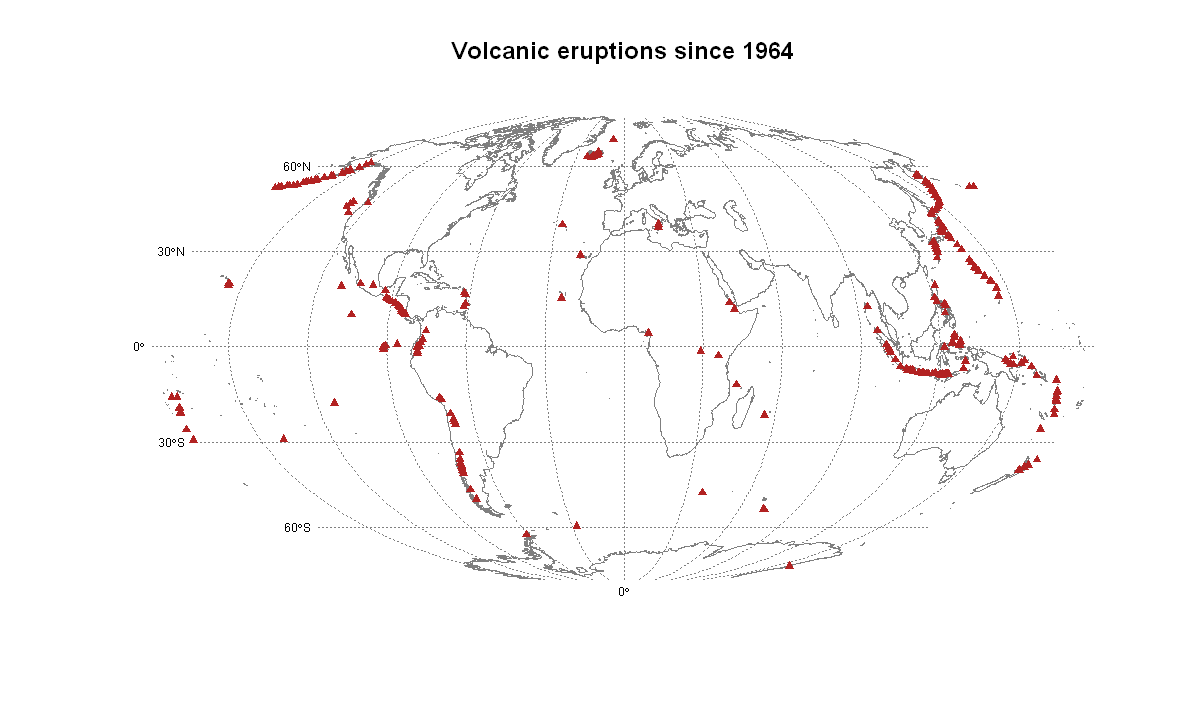

In [2]:
options(repr.plot.width=10, repr.plot.height=6)

volc.tab = read.table("data1964al.xy")
volc = SpatialPoints(volc.tab[c(2,1)])
llCRS <- CRS("+proj=longlat +ellps=WGS84")
proj4string(volc) <- llCRS
prj_new = CRS("+proj=moll")
volc_proj = spTransform(volc, prj_new)
 wrld <- map("world", interior=FALSE, xlim=c(-180,180), ylim=c(-89,89), plot=FALSE)
 wrld_p <- pruneMap(wrld, xlim=c(-179,179))
 wrld_sp <- map2SpatialLines(wrld_p, proj4string=llCRS)
 wrld_proj <- spTransform(wrld_sp, prj_new)

wrld_grd <- gridlines(wrld_sp, easts=c(-179,seq(-180,180,30),179), 
  norths=seq(-90,90,30), ndiscr=100)
wrld_grd_proj <- spTransform(wrld_grd, prj_new)
at_sp <- gridat(wrld_sp, easts=0, norths=seq(-90,90,30), offset=0.3)
at_proj <- spTransform(at_sp, prj_new)

plot(wrld_proj, col="grey50")
plot(wrld_grd_proj, add=TRUE, lty=3, col="grey50")
title("Volcanic eruptions since 1964")
points(volc_proj, cex=.8, pch=17, col="firebrick")
text(coordinates(at_proj), pos=at_proj$pos, offset=at_proj$offset, 
  labels=parse(text=as.character(at_proj$labels)), cex=0.6)

### Mt. Eden Topographic Maps

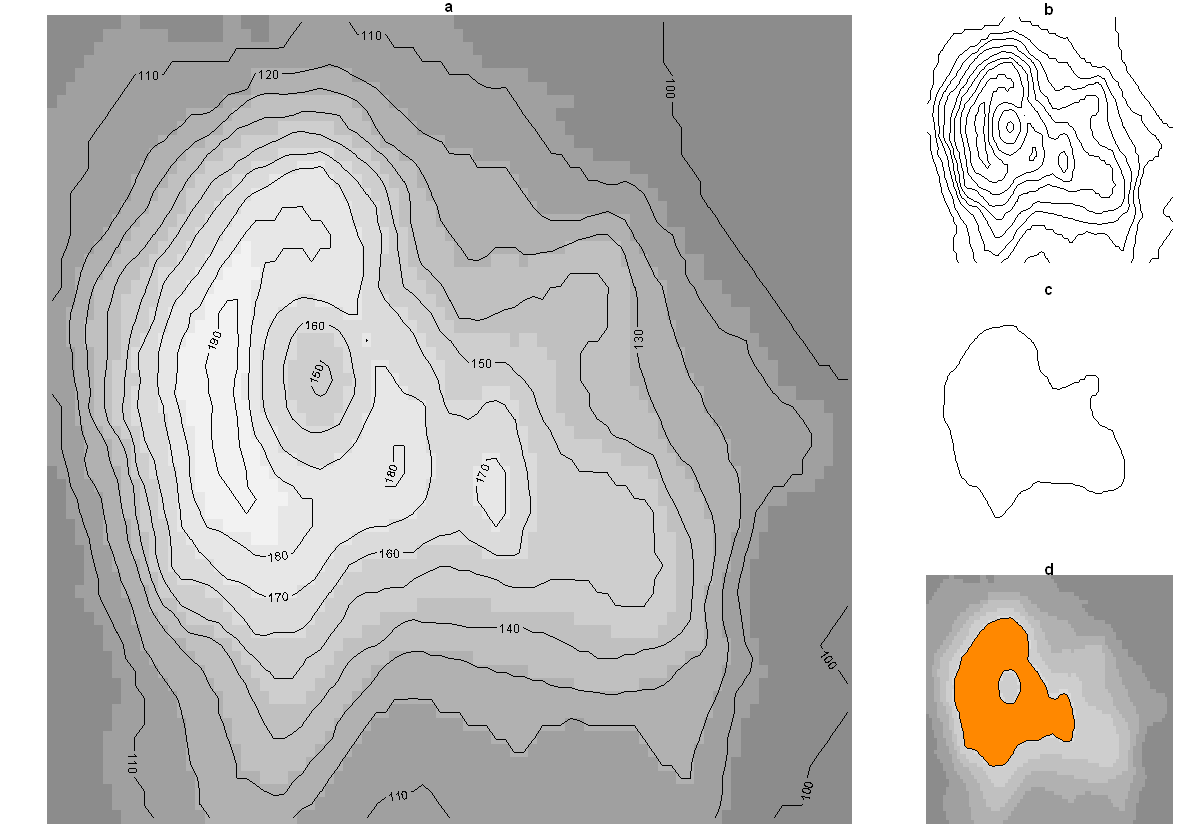

In [7]:
options(repr.plot.width=10, repr.plot.height=7)

suppressMessages(library(sp))
suppressMessages(library(maptools))

grey_gamma <- 2.2
par(mar=rep(1,4))

# main:
data(volcano)
grys <- grey.colors(8, 0.55, 0.95, grey_gamma)
layout(matrix(c(1,2,1,3,1,4),3,2,byrow=TRUE), c(3,1))
image(volcano, axes=FALSE, col=grys, asp=1, main="a")

# b:
contour(volcano, add=TRUE)
image(volcano, axes=FALSE, col='white', asp=1, main="b")
x2 <- ContourLines2SLDF(contourLines(volcano))
plot(x2, add=TRUE)

# c:
image(volcano, axes=FALSE, col='white', asp=1, main="c")
plot(x2[x2$level == 140,], add=TRUE)

# d:
image(volcano, axes=FALSE, col=grys, asp=1, main="d")
x3l1 = coordinates(x2[x2$level == 160,])[[1]][[1]]
x3l2 = coordinates(x2[x2$level == 160,])[[1]][[2]]
x3 = SpatialPolygons(list(Polygons(list(Polygon(x3l1,hole=FALSE), 
    Polygon(x3l2,hole=TRUE)), ID=c("x"))))
plot(x3, col='#FF8800', add=TRUE)